In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("Desktop\Data Science With Python\iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

C:\Users\GauravSah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

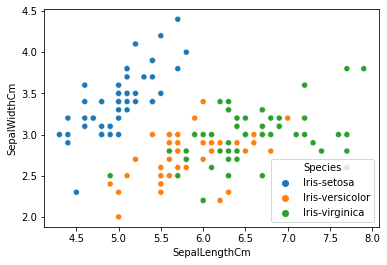

In [5]:
sb.scatterplot(data["SepalLengthCm"],data["SepalWidthCm"],hue=data["Species"])

C:\Users\GauravSah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

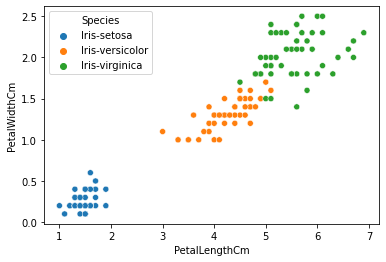

In [6]:
sb.scatterplot(data["PetalLengthCm"],data["PetalWidthCm"],hue=data["Species"])

In [7]:
x=data[["PetalLengthCm","PetalWidthCm"]]
y=data["Species"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [12]:
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
y_predict=classifier.predict(x_test)

In [14]:
pd.DataFrame({"Actual":y_test,"Predicted":y_predict})

,Actual,Predicted
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
56,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
44,Iris-setosa,Iris-setosa
29,Iris-setosa,Iris-setosa
120,Iris-virginica,Iris-virginica


In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(y_test,y_predict)

0.9555555555555556

In [17]:
classifier.score(x_test,y_test)

0.9555555555555556

In [18]:
metrics.confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

<AxesSubplot:>

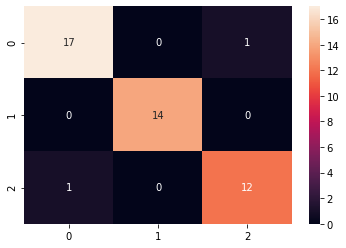

In [19]:
sb.heatmap(metrics.confusion_matrix(y_test,y_predict,labels=["Iris-versicolor","Iris-setosa","Iris-virginica"]),annot=True)

In [20]:
param_grid={"n_neighbors":[int(x) for x in np.linspace(1,10,10)]}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
rand_classifier=RandomizedSearchCV(estimator=classifier,param_distributions=param_grid,cv=5)

In [27]:
rand_classifier.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10]})

In [29]:
rand_classifier.best_params_

{'n_neighbors': 7}

In [32]:
rand_classifier.best_score_

0.9714285714285715

In [33]:
y_predict=rand_classifier.predict(x_test)

<AxesSubplot:>

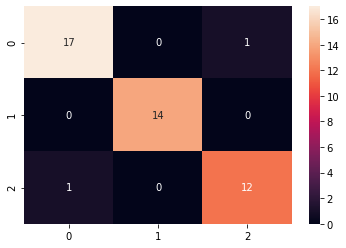

In [35]:
sb.heatmap(metrics.confusion_matrix(y_test,y_predict,labels=["Iris-versicolor","Iris-setosa","Iris-virginica"]),annot=True)